In [1]:
import pandas as pd

In [2]:
# Load the student-por.csv dataset
df = pd.read_csv("student-por.csv", sep=";")

In [3]:
# Show the first few 5 rows of the dataset
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
# Get a summary of the dataset
df.info()  # Data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [7]:
# Summary statistics for numerical features
numerical_summary = df.describe()

# Summary statistics for categorical features
categorical_summary = df.describe(include=['object'])

# Displaying the results
print("Numerical Features Summary:")
print(numerical_summary)
print("\nCategorical Features Summary:")
print(categorical_summary)

Numerical Features Summary:
              age        Medu        Fedu  traveltime   studytime    failures  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean    16.744222    2.514638    2.306626    1.568567    1.930663    0.221880   
std      1.218138    1.134552    1.099931    0.748660    0.829510    0.593235   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.000000    1.000000    1.000000    0.000000   
50%     17.000000    2.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  649.000000  649.000000  649.000000  649.000000  649.000000  649.000000   
mean     3.930663    3.180277    3.184900    1.502311    2.280431    3.536210   

In [6]:
# Check for missing values in the dataset
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

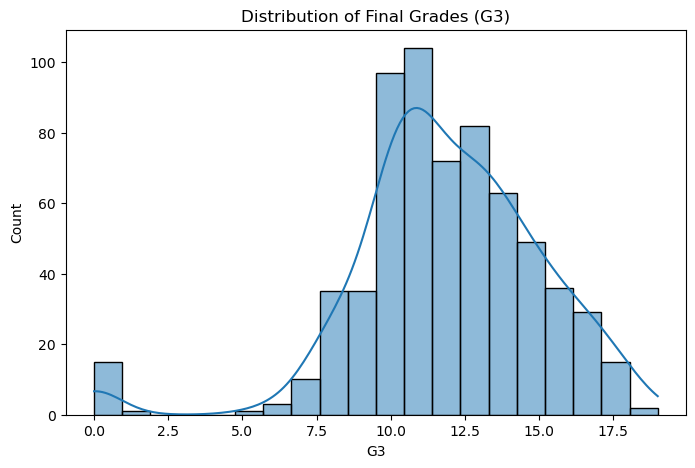

In [9]:
# Plot the distribution of final grades
plt.figure(figsize=(8, 5))
sns.histplot(df["G3"], bins=20, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()

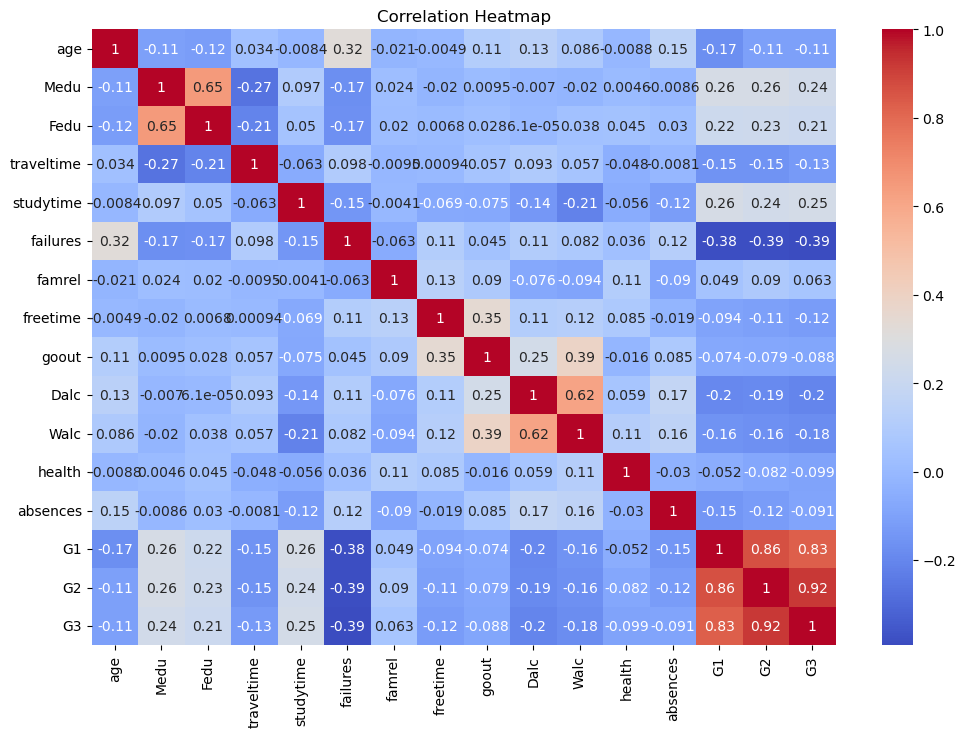

In [10]:
# Select only the numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap to understand relationships
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_columns.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

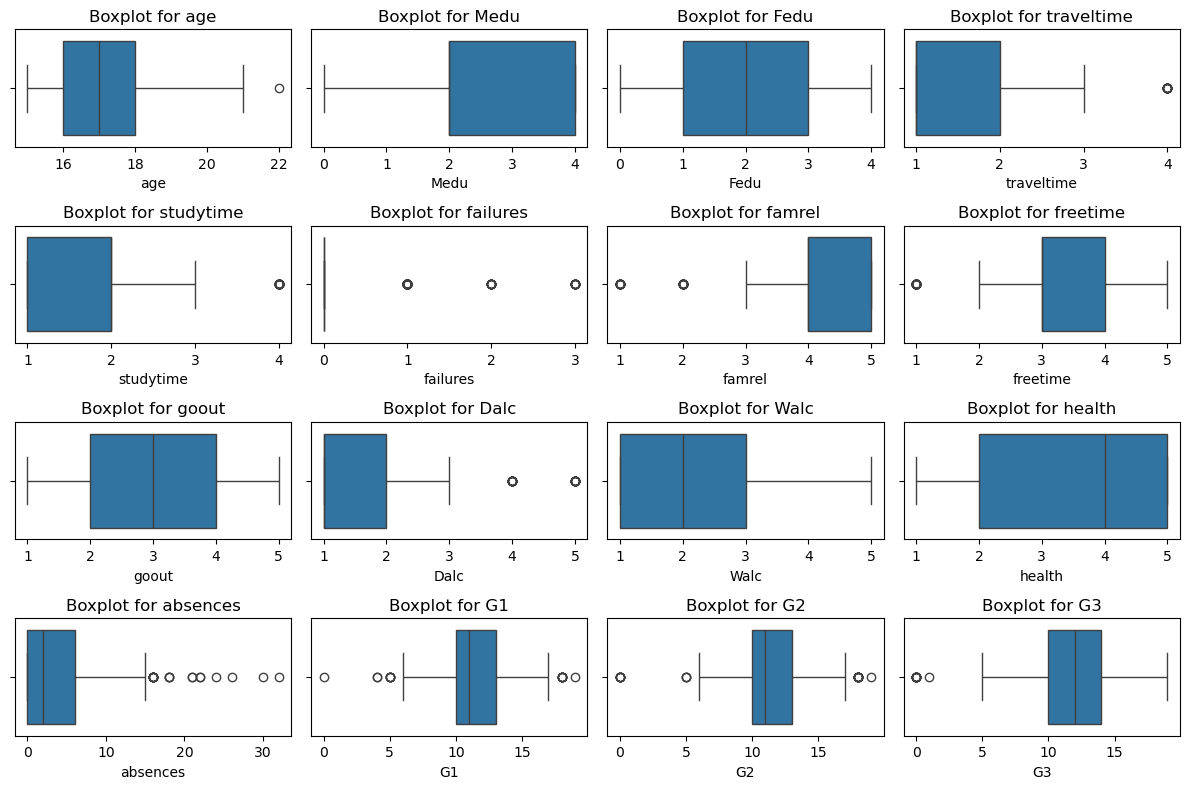

In [11]:
#identify outlier
# Plotting boxplots for each numerical feature
plt.figure(figsize=(12, 8))
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_plots = len(numerical_columns)

# Dynamically adjust the number of rows and columns
ncols = 4  # Number of columns in the grid
nrows = (num_plots // ncols) + (1 if num_plots % ncols != 0 else 0)  # Calculate rows needed

# Create subplots
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(nrows, ncols, i)  # Create subplots dynamically
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

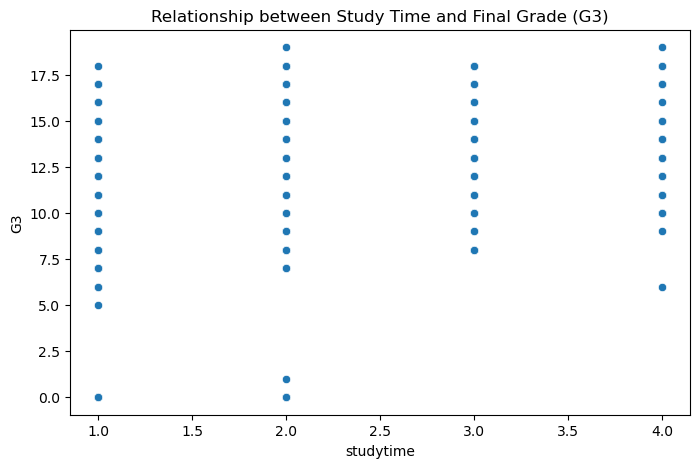

In [12]:
# Scatter plot for final grades and study time
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['studytime'], y=df['G3'])
plt.title("Relationship between Study Time and Final Grade (G3)")
plt.show()

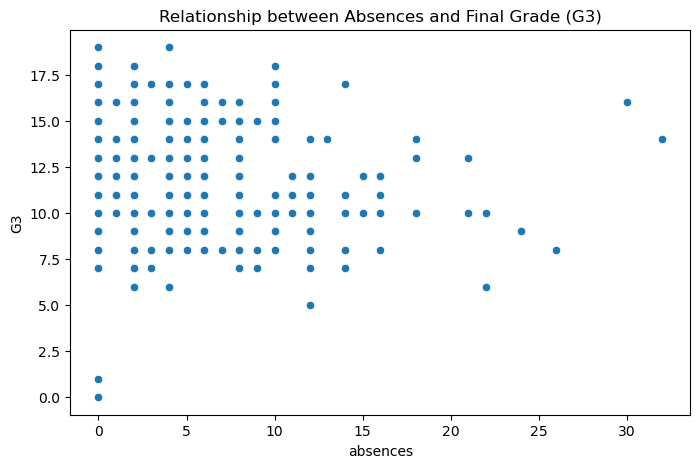

In [13]:
# Scatter plot for final grades and absences
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['absences'], y=df['G3'])
plt.title("Relationship between Absences and Final Grade (G3)")
plt.show()

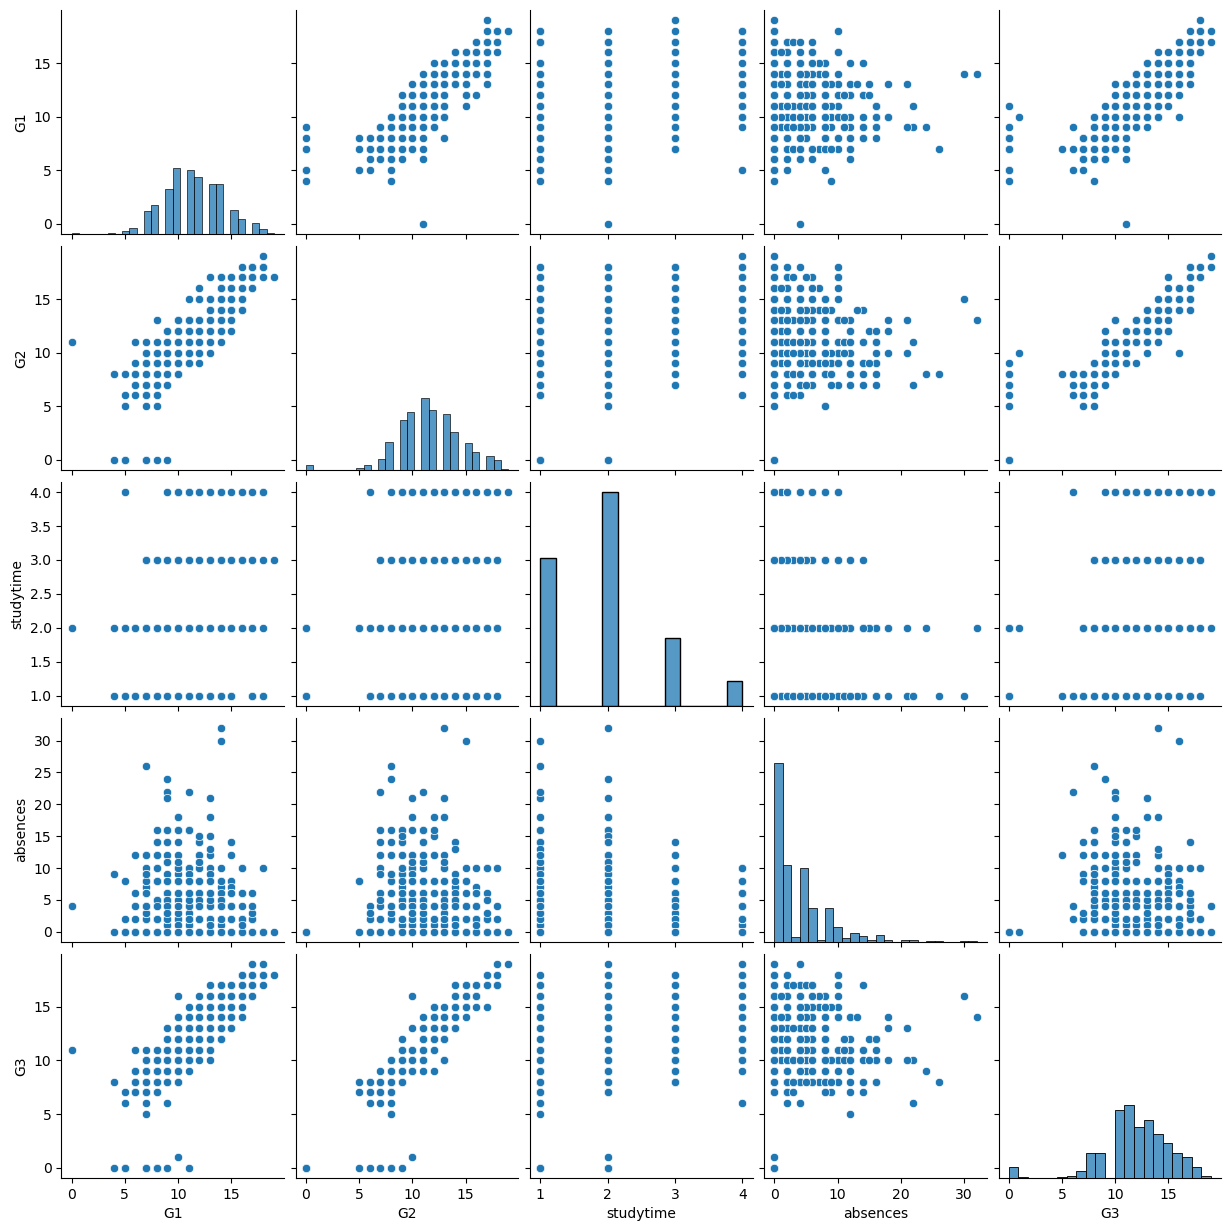

In [14]:
# Pairplot for some important features
sns.pairplot(df[['G1', 'G2', 'studytime', 'absences', 'G3']])
plt.show()

In [15]:
#data preprocesssing
# Check for missing values (already done in previous steps)
print(df.isnull().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [16]:
# Check for duplicate rows in the dataset
print(f"Number of duplicate rows: {df.duplicated().sum()}")

# Remove duplicates if found
df.drop_duplicates(inplace=True)

Number of duplicate rows: 0


In [17]:
# Define the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the IQR (Interquartile Range) and handle outliers
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Capping outliers beyond 1.5 * IQR
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [18]:
# Before removing outliers
print(f"Shape before removing outliers: {df.shape}")

# After removing outliers (the code you provided will remove them)
df = df[~((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

# After removing outliers
print(f"Shape after removing outliers: {df.shape}")

Shape before removing outliers: (393, 33)
Shape after removing outliers: (393, 33)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal categorical features
le = LabelEncoder()
df['Pstatus'] = le.fit_transform(df['Pstatus'])

# One-Hot Encoding for nominal categorical features
df = pd.get_dummies(df, drop_first=True)

# Display the updated dataframe to confirm the changes
print(df.head())

   age  Pstatus  Medu  Fedu  traveltime  studytime  failures  famrel  \
1   17        1     1     1           1          2         0       5   
2   15        1     1     1           1          2         0       4   
3   15        1     4     2           1          3         0       3   
4   16        1     3     3           1          2         0       4   
5   16        1     4     3           1          2         0       5   

   freetime  goout  ...  guardian_mother  guardian_other  schoolsup_yes  \
1         3      3  ...            False           False          False   
2         3      2  ...             True           False           True   
3         2      2  ...             True           False          False   
4         3      2  ...            False           False          False   
5         4      2  ...             True           False          False   

   famsup_yes  paid_yes  activities_yes  nursery_yes  higher_yes  \
1        True     False           False        F

In [20]:
# Print the column names to check for mismatches
print(df.columns)


Index(['age', 'Pstatus', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'school_MS', 'sex_M', 'address_U', 'famsize_LE3',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'schoolsup_yes', 'famsup_yes', 'paid_yes',
       'activities_yes', 'nursery_yes', 'higher_yes', 'internet_yes',
       'romantic_yes'],
      dtype='object')


In [21]:
# Check the columns to make sure they exist
categorical_columns = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                       'internet', 'romantic']

# Print to check if all columns exist
missing_columns = [col for col in categorical_columns if col not in df.columns]
print("Missing columns:", missing_columns)

Missing columns: ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']


In [22]:
# Check the columns to make sure they exist
categorical_columns = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                       'internet', 'romantic']

# Print to check if all columns exist
missing_columns = [col for col in categorical_columns if col not in df.columns]
print("Missing columns:", missing_columns)

# One-Hot Encoding for nominal categorical features
# We will apply encoding only to the columns that exist in the dataframe
df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

# Display the first few rows to confirm changes
print(df.head())

Missing columns: ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   age  Pstatus  Medu  Fedu  traveltime  studytime  failures  famrel  \
1   17        1     1     1           1          2         0       5   
2   15        1     1     1           1          2         0       4   
3   15        1     4     2           1          3         0       3   
4   16        1     3     3           1          2         0       4   
5   16        1     4     3           1          2         0       5   

   freetime  goout  ...  guardian_mother  guardian_other  schoolsup_yes  \
1         3      3  ...            False           False          False   
2         3      2  ...             True           False           True   
3         2      2  ...             True           False          False   
4         3      2  ...            False           False          False   
5         4      2

In [23]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for ordinal categorical features
# 'Pstatus' is an ordinal feature with "T" and "A" categories
le = LabelEncoder()
df['Pstatus'] = le.fit_transform(df['Pstatus'])

# Check the columns to make sure they exist
categorical_columns = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 
                       'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 
                       'internet', 'romantic']

# Print to check if all columns exist
missing_columns = [col for col in categorical_columns if col not in df.columns]
print("Missing columns:", missing_columns)

# One-Hot Encoding for nominal categorical features
# We will apply encoding only to the columns that exist in the dataframe
df = pd.get_dummies(df, columns=[col for col in categorical_columns if col in df.columns], drop_first=True)

# Display the first few rows to confirm changes
print(df.head())


Missing columns: ['school', 'sex', 'address', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   age  Pstatus  Medu  Fedu  traveltime  studytime  failures  famrel  \
1   17        1     1     1           1          2         0       5   
2   15        1     1     1           1          2         0       4   
3   15        1     4     2           1          3         0       3   
4   16        1     3     3           1          2         0       4   
5   16        1     4     3           1          2         0       5   

   freetime  goout  ...  guardian_mother  guardian_other  schoolsup_yes  \
1         3      3  ...            False           False          False   
2         3      2  ...             True           False           True   
3         2      2  ...             True           False          False   
4         3      2  ...            False           False          False   
5         4      2

In [24]:
# Import necessary libraries for scaling and normalization
from sklearn.preprocessing import StandardScaler

# Standardization (zero mean, unit variance) - useful for models like SVM, KNN, and Neural Networks
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])  # Apply to numerical columns

In [25]:
# Alternatively, use Normalization (scaling between 0 and 1) if required by certain models
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns]) # Apply MinMax scaling

In [26]:
# 6. Feature Engineering

# Creating interaction terms: Combine studytime and failures into a new feature
df['study_fail_interaction'] = df['studytime'] * df['failures']  # Interaction between study time and failures

# Binning absences into categories (helps models understand ranges better)
df['absences_bin'] = pd.cut(df['absences'], bins=[0, 5, 10, 20, 30, 50], labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

In [27]:
# 7. Splitting Data into Training and Testing Sets

# Define feature columns (X) and target column (y)
X = df.drop(columns=['G3'])  # Drop the target column 'G3' from feature set
y = df['G3']  # Target variable is the 'G3' column (final grade)

# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Set random_state for reproducibility

# Print shapes of the training and test sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")

Training Features Shape: (314, 43)
Testing Features Shape: (79, 43)


In [28]:
from sklearn.ensemble import RandomForestRegressor  # Importing RandomForestRegressor

# Initialize the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility

In [30]:
print(X_train.dtypes)

age                        float64
Pstatus                      int64
Medu                       float64
Fedu                       float64
traveltime                 float64
studytime                  float64
failures                   float64
famrel                     float64
freetime                   float64
goout                      float64
Dalc                       float64
Walc                       float64
health                     float64
absences                   float64
G1                         float64
G2                         float64
school_MS                     bool
sex_M                         bool
address_U                     bool
famsize_LE3                   bool
Mjob_health                   bool
Mjob_other                    bool
Mjob_services                 bool
Mjob_teacher                  bool
Fjob_health                   bool
Fjob_other                    bool
Fjob_services                 bool
Fjob_teacher                  bool
reason_home         

In [31]:
# Convert 'absences_bin' from category to numeric if it's binary (e.g., 'Low' and 'High')
X_train['absences_bin'] = X_train['absences_bin'].cat.codes
X_test['absences_bin'] = X_test['absences_bin'].cat.codes


In [32]:
# Train the model on the training data
rf.fit(X_train, y_train)

# Check the trained model's feature importance
print(f"Feature importances: {rf.feature_importances_}")

Feature importances: [1.27727462e-02 6.45323168e-04 6.09768568e-03 3.10017242e-03
 2.09132090e-03 2.57063013e-03 0.00000000e+00 3.19961375e-03
 3.88715066e-03 4.18026796e-03 2.19221263e-03 1.10480391e-02
 7.23174591e-03 6.04131586e-03 2.56904946e-02 8.68160518e-01
 1.16816801e-03 1.95153407e-03 1.28873624e-03 2.98850149e-03
 7.58252717e-04 3.06252816e-03 1.54660968e-03 1.10535890e-03
 1.33456275e-03 1.46811991e-03 1.97626540e-03 4.09522581e-04
 1.18612775e-03 1.18784691e-03 1.58498948e-03 1.17515589e-03
 4.78779695e-04 5.39290068e-03 2.26484563e-03 1.28290350e-03
 1.57418629e-03 9.69945519e-04 3.36567003e-04 1.14274505e-03
 2.06654793e-03 0.00000000e+00 1.38906156e-03]


In [33]:
# To perform hyperparameter tuning
from sklearn.model_selection import GridSearchCV  

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at leaf nodes
    'bootstrap': [True, False]  # Whether bootstrap sampling is used
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [34]:
# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Train the model on the entire training dataset using the best hyperparameters
best_rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, min_samples_split=10, n_estimators=200,
                      random_state=42)

In [35]:
# Predict on test data
y_pred = best_rf.predict(X_test)


In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Square root of MSE
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")


Mean Squared Error (MSE): 0.0066
Root Mean Squared Error (RMSE): 0.0815
R-squared (R²): 0.8488


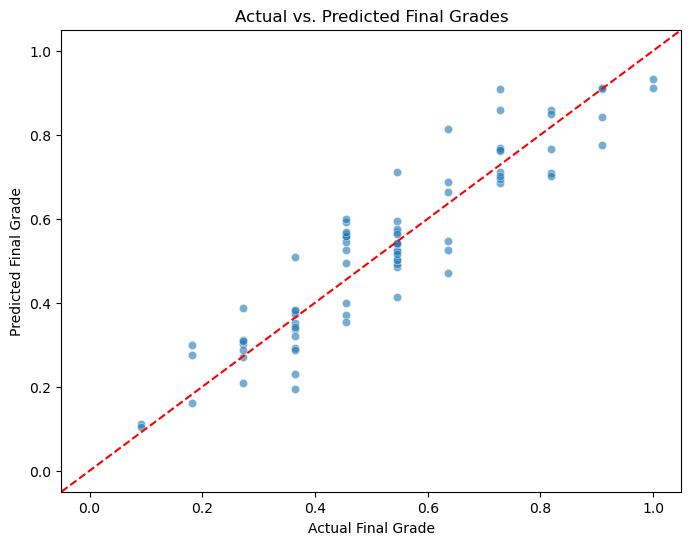

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Final Grade")
plt.ylabel("Predicted Final Grade")
plt.title("Actual vs. Predicted Final Grades")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Reference line (y = x)
plt.show()


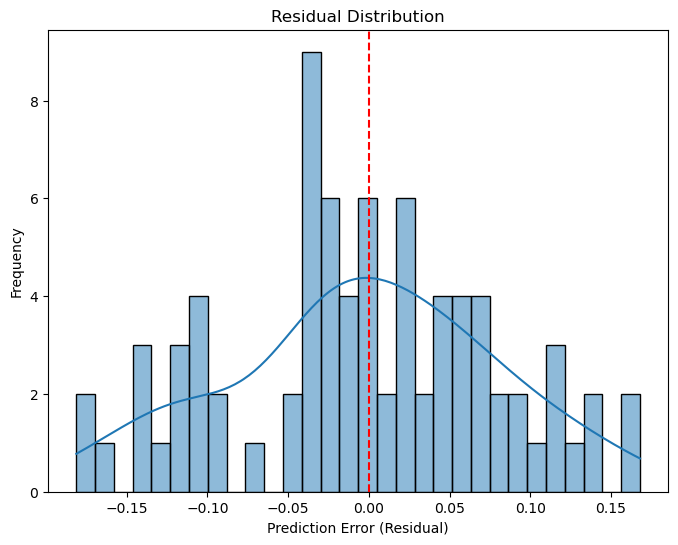

In [38]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle="--")
plt.xlabel("Prediction Error (Residual)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


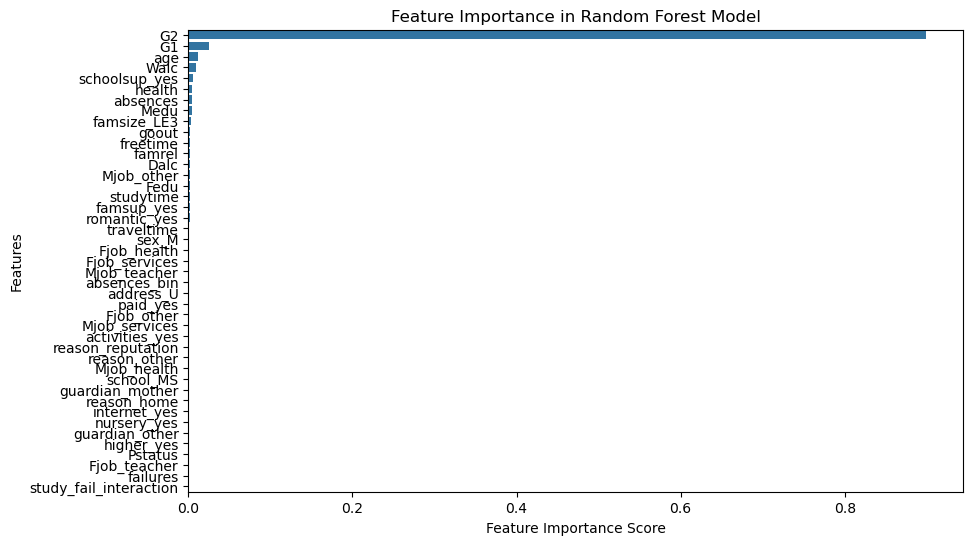

In [40]:
import numpy as np

# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train.columns

# Sort feature importances
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=[feature_names[i] for i in indices])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.show()


In [41]:
from sklearn.dummy import DummyRegressor

# Create baseline model (predicts mean value)
dummy = DummyRegressor(strategy="mean")
dummy.fit(X_train, y_train)
y_dummy_pred = dummy.predict(X_test)

# Evaluate baseline
baseline_mse = mean_squared_error(y_test, y_dummy_pred)
baseline_r2 = r2_score(y_test, y_dummy_pred)

print(f"Baseline MSE: {baseline_mse:.4f}")
print(f"Baseline R²: {baseline_r2:.4f}")


Baseline MSE: 0.0442
Baseline R²: -0.0048
